# Pytorch基础

基础操作——Tensor  
Tensors 类似于 NumPy 的 ndarrays ，同时 Tensors 可以使用 GPU 进行计算。

In [1]:
import torch

# 建立空tensor
empty_tensor = torch.empty(4, 3)
print(empty_tensor)
# 建立全0的tensor
zeros_tensor = torch.zeros(4, 3)
print(zeros_tensor)
# 建立一个随机初始值的tensor（0~1均匀分布）
rand_tensor = torch.rand(4, 3)
print(rand_tensor)
# 建立一个随机初始值的tensor（标准正态分布）
randn_tensor = torch.randn(4, 3)
print(rand_tensor)

tensor([[9.9184e-39, 9.0000e-39, 1.0561e-38],
        [1.0653e-38, 4.1327e-39, 8.9082e-39],
        [9.8265e-39, 9.4592e-39, 1.0561e-38],
        [1.0653e-38, 1.0469e-38, 9.5510e-39]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.3758, 0.5150, 0.9221],
        [0.3989, 0.0524, 0.7381],
        [0.8572, 0.5311, 0.3176],
        [0.7115, 0.1022, 0.0726]])
tensor([[0.3758, 0.5150, 0.9221],
        [0.3989, 0.0524, 0.7381],
        [0.8572, 0.5311, 0.3176],
        [0.7115, 0.1022, 0.0726]])


以下这些，用的比较少，用得到时再查也没问题

In [2]:
# 全1的tensor
all_one_tensor = torch.ones(4, 3)
# 对角线全1的矩阵（单位矩阵）4*4
identity_tensor = torch.eye(4)

# torch.diag有两种作用——
# 输入一个一维的Tensor，生成一个对角线是指定的值，别的全0的矩阵
a = torch.tensor([1, 2, 3])
print(a)
x = torch.diag(a)
print(x)
# 输入一个二维的Tensor，提取出对角线上的值
a = torch.tensor([[1, 2, 3],[4, 5, 6]])
print(a)
x = torch.diag(a)
print(x)

# 和tensor x 类型一样，维度一样，但是全0
x = torch.zeros_like(x)
# 和tensor x 类型一样，维度一样，但是全1
x = torch.ones_like(x)

tensor([1, 2, 3])
tensor([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([1, 5])


In [3]:
# 建立tensor的同时指定数据类型
x = torch.zeros(5, 3)
print(x.dtype)
x = torch.zeros(5, 3, dtype=torch.long)
print(x.dtype)

torch.float32
torch.int64


Tensor同样可以从list或者numpy的array中初始化

In [4]:
# 从list初始化，list必须维度一致（长得像个矩阵）
a = [[1, 2, 3], [4, 5, 6]]
x = torch.tensor(a)
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [5]:
# 从numpy的array初始化
import numpy as np
arr = np.arange(12).reshape(3, 4)
# x = torch.tensor(arr)
x = torch.from_numpy(arr)
print(x)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]], dtype=torch.int32)


Tensor间的基本加减乘除，和numpy里的array类似：

In [6]:
# 矩阵加减，两个Tensor必须维度相同，按每一个位置上加减
# 这里两个都是4*3的矩阵
tmp = all_one_tensor + rand_tensor
print(tmp)
tmp = all_one_tensor - rand_tensor
print(tmp)

tensor([[1.3758, 1.5150, 1.9221],
        [1.3989, 1.0524, 1.7381],
        [1.8572, 1.5311, 1.3176],
        [1.7115, 1.1022, 1.0726]])
tensor([[0.6242, 0.4850, 0.0779],
        [0.6011, 0.9476, 0.2619],
        [0.1428, 0.4689, 0.6824],
        [0.2885, 0.8978, 0.9274]])


In [7]:
# 矩阵数乘、除，按每一个位置上乘、除
tmp = 100 * all_one_tensor
print(tmp)
tmp = all_one_tensor / 10
print(tmp)

tensor([[100., 100., 100.],
        [100., 100., 100.],
        [100., 100., 100.],
        [100., 100., 100.]])
tensor([[0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000],
        [0.1000, 0.1000, 0.1000]])


In [8]:
# 求和
s = torch.sum(all_one_tensor)
print(s)
print(all_one_tensor)
# 按某一个维度求和
s = torch.sum(all_one_tensor, axis=0)
print(s)
s = torch.sum(all_one_tensor, axis=1)
print(s)

tensor(12.)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([4., 4., 4.])
tensor([3., 3., 3., 3.])


In [9]:
# 乘法，默认的乘号的乘法是一个一个对应位置乘的，两个Tensor维度要一致
print(rand_tensor)
print(randn_tensor)
tmp = rand_tensor * randn_tensor
# tmp = torch.mul(rand_tensor, all_one_tensor)
print(tmp)

tensor([[0.3758, 0.5150, 0.9221],
        [0.3989, 0.0524, 0.7381],
        [0.8572, 0.5311, 0.3176],
        [0.7115, 0.1022, 0.0726]])
tensor([[-0.7307, -2.9630, -0.9224],
        [ 0.5896, -1.1238,  0.2872],
        [-0.5064,  0.8420, -0.0930],
        [ 1.0981, -1.9525, -1.6456]])
tensor([[-0.2746, -1.5260, -0.8505],
        [ 0.2352, -0.0589,  0.2120],
        [-0.4341,  0.4472, -0.0296],
        [ 0.7813, -0.1995, -0.1195]])


In [10]:
# 点乘，如果是两个一维的可以使用dot，两个高维的可以使用matmul
# identity_tensor是4*4，all_one_tensor是4*3，总之和高中数学的矩阵点乘一致
print(identity_tensor)
print(all_one_tensor)
tmp = torch.matmul(identity_tensor, all_one_tensor)
print(tmp)
# tmp = torch.matmul(all_one_tensor, identity_tensor) 会报错

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


以下是一些用不太到的乘法：

In [11]:
# 叉乘，一般用在图形学比较多，ML相关用得不多
a = torch.tensor([1, 0 , -1])
b = torch.tensor([2, 3, 1])
tmp = torch.cross(a, b)
print(tmp)

tensor([ 3, -3,  3])


In [12]:
# 行列式，同样用的很少，注意必须得是float
a = torch.tensor([[1, 2], [3, 4]], dtype=float)
d = torch.det(a)
print(d)

tensor(-2., dtype=torch.float64)


In [13]:
# 矩阵求逆，必须是满秩
print(a)
inv_a = torch.inverse(a)
print(inv_a)
pinv_a = torch.pinverse(a)
print(pinv_a)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]], dtype=torch.float64)
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]], dtype=torch.float64)


In [14]:
# 比如刚才说到的
# [[400, -201],
# [-800, 401]] * [x1, x2] = [200, -200]
a = [[400, -201], [-800, 401]]
b = [200, -200]
a = torch.tensor(a, dtype=float)
b = torch.tensor(b, dtype=float)
a_i = torch.inverse(a)
x = torch.matmul(a_i, b)
print(x)

tensor([-100.0000, -200.0000], dtype=torch.float64)


一些对矩阵的操作——

In [15]:
# 矩阵转置，转置会导致Tensor内存中不连续！
print(all_one_tensor)
tmp = all_one_tensor.T
print(tmp)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [16]:
# 切片，注意这是共享内存的，不会单独给你复制一份！
print(rand_tensor)
tmp = rand_tensor[:,1:]
print(tmp)

tensor([[0.3758, 0.5150, 0.9221],
        [0.3989, 0.0524, 0.7381],
        [0.8572, 0.5311, 0.3176],
        [0.7115, 0.1022, 0.0726]])
tensor([[0.5150, 0.9221],
        [0.0524, 0.7381],
        [0.5311, 0.3176],
        [0.1022, 0.0726]])


In [17]:
# 拼接
tmp = torch.cat((all_one_tensor, zeros_tensor, rand_tensor), axis=0)
print(tmp)
concat = torch.cat((all_one_tensor, rand_tensor), axis=1)
print(concat)

tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.3758, 0.5150, 0.9221],
        [0.3989, 0.0524, 0.7381],
        [0.8572, 0.5311, 0.3176],
        [0.7115, 0.1022, 0.0726]])
tensor([[1.0000, 1.0000, 1.0000, 0.3758, 0.5150, 0.9221],
        [1.0000, 1.0000, 1.0000, 0.3989, 0.0524, 0.7381],
        [1.0000, 1.0000, 1.0000, 0.8572, 0.5311, 0.3176],
        [1.0000, 1.0000, 1.0000, 0.7115, 0.1022, 0.0726]])


In [18]:
# 求最大值/最小值的索引
print(concat)
# 整个矩阵里最大的值在哪？
m = concat.argmax()
print(m)
# 每一列里最大的值在哪？
m = concat.argmax(axis=0)
print(m)
# 每一行里最大的值在哪？
m = concat.argmax(axis=1)
print(m)

tensor([[1.0000, 1.0000, 1.0000, 0.3758, 0.5150, 0.9221],
        [1.0000, 1.0000, 1.0000, 0.3989, 0.0524, 0.7381],
        [1.0000, 1.0000, 1.0000, 0.8572, 0.5311, 0.3176],
        [1.0000, 1.0000, 1.0000, 0.7115, 0.1022, 0.0726]])
tensor(20)
tensor([3, 3, 3, 2, 2, 0])
tensor([2, 2, 2, 2])


In [19]:
# 求最大值/最小值
# 求最大值
m = concat.max()
print(m)
# 求最小值
m = concat.min()
print(m)

tensor(1.)
tensor(0.0524)


In [20]:
# 复制，注意python自带的copy无法使用
# concat_2 = concat.copy() 会报错
concat_2 = concat.clone()
print(concat_2)

tensor([[1.0000, 1.0000, 1.0000, 0.3758, 0.5150, 0.9221],
        [1.0000, 1.0000, 1.0000, 0.3989, 0.0524, 0.7381],
        [1.0000, 1.0000, 1.0000, 0.8572, 0.5311, 0.3176],
        [1.0000, 1.0000, 1.0000, 0.7115, 0.1022, 0.0726]])


In [21]:
# 改变形状，注意view函数的结果共用内存，我们只是改变了怎么“看”这个tensor，内存存储的方式没有变化
# 此外，view函数只能对连续存储的tensor使用，简单来说这个tensor之前不能修改过内存中的连续性，例如转置就会破坏掉这种连续性
print(concat)
tmp = tmp.view(-1, 3)
print(tmp)
# tmp = concat.T
# tmp = tmp.view(-1, 3)
# concat

tensor([[1.0000, 1.0000, 1.0000, 0.3758, 0.5150, 0.9221],
        [1.0000, 1.0000, 1.0000, 0.3989, 0.0524, 0.7381],
        [1.0000, 1.0000, 1.0000, 0.8572, 0.5311, 0.3176],
        [1.0000, 1.0000, 1.0000, 0.7115, 0.1022, 0.0726]])
tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.3758, 0.5150, 0.9221],
        [0.3989, 0.0524, 0.7381],
        [0.8572, 0.5311, 0.3176],
        [0.7115, 0.1022, 0.0726]])


In [22]:
# 而reshape可以对非连续存储的tensor使用 shift+tab
concat_2 = concat_2.T
concat_2 = concat_2.reshape(-1, 3)
print(concat.shape)
print(concat_2.shape)
concat_2.reshape??

torch.Size([4, 6])
torch.Size([8, 3])


In [23]:
# 取出一维tensor中的数据，必须是只有一个元素的tensor
a = torch.tensor(1.0)
print(a.item())
print(type(a.item()))

1.0
<class 'float'>


不同Device上的Tensor

In [24]:
# 把cpu上的tensor导入到gpu上
print(concat)
if torch.cuda.is_available():
    print("cuda is available.")
    concat_gpu = concat.to('cuda')
    # concat_gpu = concat.cuda()
    print(concat_gpu)

tensor([[1.0000, 1.0000, 1.0000, 0.3758, 0.5150, 0.9221],
        [1.0000, 1.0000, 1.0000, 0.3989, 0.0524, 0.7381],
        [1.0000, 1.0000, 1.0000, 0.8572, 0.5311, 0.3176],
        [1.0000, 1.0000, 1.0000, 0.7115, 0.1022, 0.0726]])
cuda is available.
tensor([[1.0000, 1.0000, 1.0000, 0.3758, 0.5150, 0.9221],
        [1.0000, 1.0000, 1.0000, 0.3989, 0.0524, 0.7381],
        [1.0000, 1.0000, 1.0000, 0.8572, 0.5311, 0.3176],
        [1.0000, 1.0000, 1.0000, 0.7115, 0.1022, 0.0726]], device='cuda:0')


In [25]:
# 把gpu的tensor导入到cpu上
argmx_gpu = concat_gpu.argmax(axis=0)
# argmx_gpu.numpy()
print(argmx_gpu)
argmx = argmx_gpu.to('cpu')
# argmx = argmx_gpu.cpu()
argmx.numpy()
print(argmx)

tensor([3, 3, 3, 2, 2, 0], device='cuda:0')
tensor([3, 3, 3, 2, 2, 0])


Tensor相比array多了啥？

In [26]:
# 会自动记录这个Tensor由哪些Tensor，通过什么计算而得来！
# 只需要加入requires_grad=True
a = torch.tensor([1, 2, 3, 4], dtype=float, requires_grad=True)
print(a)
print(a.grad_fn)

tensor([1., 2., 3., 4.], dtype=torch.float64, requires_grad=True)
None


In [27]:
b = a + 1
print(b)
print(b.grad_fn)

tensor([2., 3., 4., 5.], dtype=torch.float64, grad_fn=<AddBackward0>)


In [28]:
c = b * b * 3
print(c)
print(c.grad_fn)

tensor([12., 27., 48., 75.], dtype=torch.float64, grad_fn=<MulBackward0>)


In [29]:
d = c.mean()
print(d)
print(d.grad_fn)

tensor(40.5000, dtype=torch.float64, grad_fn=<MeanBackward0>)


那么这样，我们就得到了a->b->c->d的这样一个计算的链条（确切来说是个DAG），我们可以从d开始，一路反推回a的导数！  
简单来说，我们通过d里的MeanBackward找到c，再通过c里的MulBackward找到b，一直找到a！  
a因为是直接创建的，所以没有继续找下去的必要了，这种节点叫“叶子节点”  
那么，我们如何求导数呢？很简单，一句代码。

In [30]:
d.backward(retain_graph=True)

然后我们就能得到dd/da了，这个结果保存在grad属性中~

In [31]:
print(a.grad)

tensor([3.0000, 4.5000, 6.0000, 7.5000], dtype=torch.float64)


d = (a+1)\*(a+1)\*3/4，大家可以手动计算一下在a=1,2,3,4时的导数，是否正确~  
此外，这个梯度是会累加的！

In [32]:
d.backward()
print(a.grad)

tensor([ 6.,  9., 12., 15.], dtype=torch.float64)


In [33]:
# 清除梯度，_代表in-place操作
print(a.grad.data.zero_())

tensor([0., 0., 0., 0.], dtype=torch.float64)


对于初学者而言，建议是就记住，最终必须使用一个标量进行backward！  
在大部分的机器学习场景中，这个标量就是我们的Loss函数值。  
简单来说pytorch的设计人员觉得你用一个张量对另一个张量求导，不够直观，而且计算费时费力，不如让你最终汇总到一个单一数值上再进行反向求导。

有的时候，我们有一些已经调试到很不错的网络参数（例如谷歌已经预训练好的BERT模型），我们不希望去变更它，怎么办呢？

In [34]:
# 一开始的时候就设置requires_grad=False
# a = torch.tensor([1, 2, 3, 4], dtype=float)
a = torch.tensor([1, 2, 3, 4], dtype=float, requires_grad=False)
# 或者使用with torch.no_grad()
with torch.no_grad():
    a = torch.tensor([1, 2, 3, 4], dtype=float)

好了，说了这么多，接下来让我们动手来设计一个线性回归模型吧！  

一个典型的网络训练过程包括以下几点：  
1.定义一个包含可训练参数的网络  
2.迭代整个输入  
3.通过网络处理输入  
4.计算损失(loss)  
5.反向传播梯度到网络的参数  
6.更新网络的参数  

假设房价p受面积x1和房龄x2的影响——  
p = x1w1+x2w2+b  
其中w1,w2是权重，b是偏移值。  

我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。我们希望用特征用来表征样本的特点。  

在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。  
一个常用的选择是平方函数——  
L(x1,x2,b) = 1/2(y_t-y)^2

我们的期望就是选择合适的x1，x2，b，使得L函数值最小。

In [35]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import random

In [36]:
# 我们来随机生成一堆数据
num_inputs = 2
num_examples = 1000
true_w = [2, -4.2]
true_b = 5
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [37]:
print(features[0], labels[0])

tensor([ 0.1705, -0.2064]) tensor(6.2108)


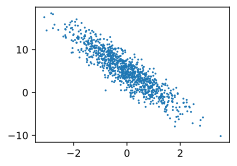

In [38]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [39]:
# 我们并不需要一次性提取所有数据，可以一次取几个
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)
# 测试一下
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X)
    print(y)
    break

tensor([[-2.2541e+00,  6.6090e-01],
        [ 1.2651e-03, -6.5755e-02],
        [-1.6557e+00, -2.0145e-01],
        [ 1.1230e+00, -4.0486e-01],
        [ 1.3037e+00,  7.2524e-01],
        [ 3.4690e-01, -6.8997e-01],
        [-2.1016e+00, -2.3627e-01],
        [ 1.4993e+00,  1.5172e+00],
        [-1.9430e+00,  1.5344e-01],
        [ 8.5794e-01,  4.9475e-01]])
tensor([-2.2716,  5.2705,  2.5379,  8.9372,  4.5671,  8.5895,  1.7891,  1.6285,
         0.4636,  4.6197])


In [40]:
# 模型初始化
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)

In [41]:
# 定义模型函数
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [42]:
# 定义损失函数
def squared_loss(y_hat, y):
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss（均方误差）并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [43]:
# 定义优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [44]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。
    # X和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.046669
epoch 2, loss 0.000147
epoch 3, loss 0.000055
epoch 4, loss 0.000055
epoch 5, loss 0.000055


In [45]:
# 对比一下真实的W和训练出的w
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -4.2] 
 tensor([[ 2.0003],
        [-4.1997]], requires_grad=True)
5 
 tensor([5.0001], requires_grad=True)
